In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import imp
import numpy as np
from scipy import constants

import lsst.daf.persistence as daf_persistence
from lsst.sims.photUtils import Bandpass, PhotometricParameters
from lsst.utils import getPackageDir

In [3]:
def look(img, range=None, x_range=None, y_range=None):
    """Simple function to wrap matplotlib and display an image with a colorbar."""
    plt.figure(figsize=(8, 6))
    if range is None:
        range = [np.min(img), np.max(img)]
    img_use = np.clip(img, range[0], range[1])
    if x_range is not None:
        x0 = int(x_range[0])
        x1 = int(x_range[1])
        if x0 < 0:
            img_use = np.roll(img_use, -x0, axis=1)
            x1 -= x0
            x0 = 0
        img_use = img_use[:, x0: x1]
    if y_range is not None:
        y0 = int(y_range[0])
        y1 = int(y_range[1])
        if y0 < 0:
            img_use = np.roll(img_use, -y0, axis=0)
            y1 -= y0
            y0 = 0
        img_use = img_use[y0: y1, :]
    fig_show = plt.imshow(img_use, interpolation='none', origin='lower', cmap=cm.rainbow)
    plt.colorbar(fig_show, orientation='vertical', shrink=1)
#    cbar.set_label('DCR (arcsec)', labelpad=0)
    plt.show()

In [314]:
repository = "/Users/sullivan/LSST/simulations/test6/output_data"
obsid_range = [200, 224, 3]
band_name = "g"

In [315]:
imp.load_source('dcr_1d_correction', '/Users/sullivan/LSST/LSST-DCR/experimental_DCR/python/dcr_1d_correction.py')
from dcr_1d_correction import DcrCorrection

In [316]:
self = DcrCorrection(n_step=3, repository=repository, obsid_range=obsid_range, band_name=band_name)

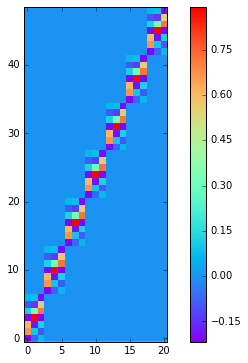

In [317]:
look(self.dcr_matrix[1])

In [318]:
self.build_transfer_matrix()

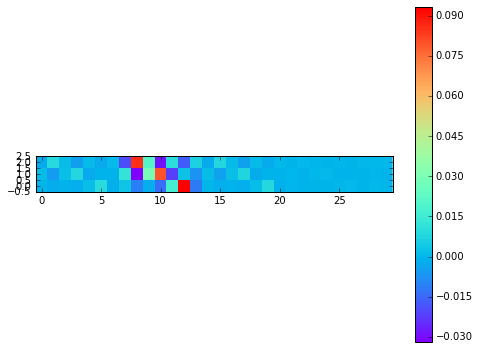

In [319]:
look(self.transfer[1],x_range=[0,30])

In [320]:
self.build_model()

In [321]:
model_arr = []
for m_i in range(self.n_step):
    model_arr.append(self.view_model(m_i))

(0, 9136.2265916528413, -2.6870454567453446, 4.0345291940955113)
(1, 7989.9889350176372, -3.0171097528706516, 3.0642568659459148)
(2, 7066.2105550694951, -2.5674395139604664, 3.098305580445579)


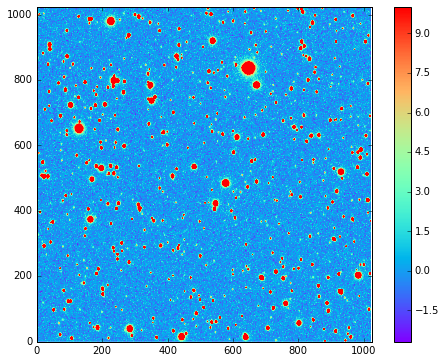

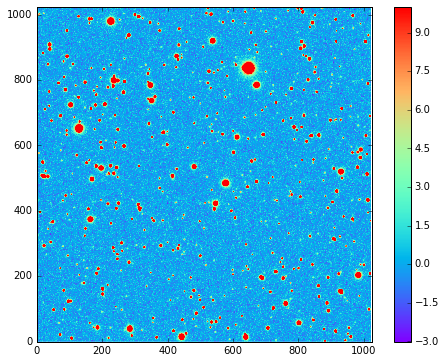

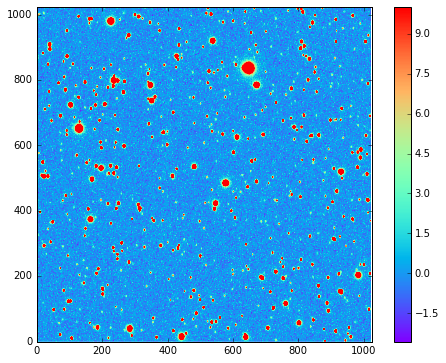

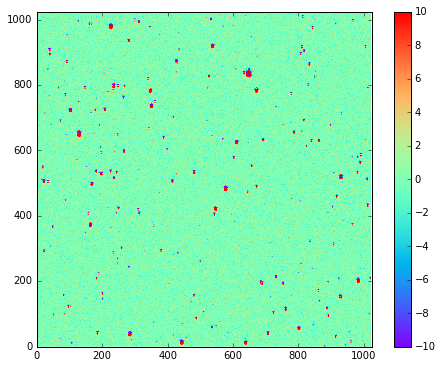

In [327]:
for _i, model in enumerate(model_arr):
    print(_i, np.max(model), np.min(model), np.mean(model))
for model in model_arr:
    look(model, range=[-10,10])
look(model_arr[0]-model_arr[2]*np.max(model_arr[0])/np.max(model_arr[2]), range=[-10,10])

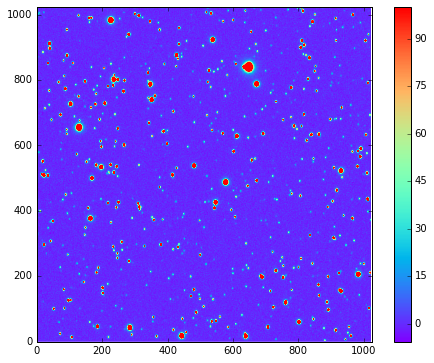

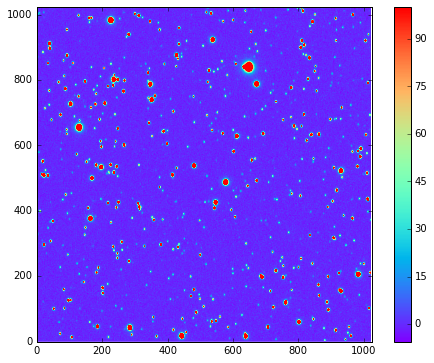

In [329]:
template_exposure_gen = self.generate_templates_from_model(obsid_range=[208,210], output_directory='/Users/sullivan/LSST/simulations/test6/')
# im=[]
for exp in template_exposure_gen:
    look(exp.getMaskedImage().getImage().getArray(), range=[-1e2,1e2])
#     im.append(exp.getMaskedImage().getImage().getArray())

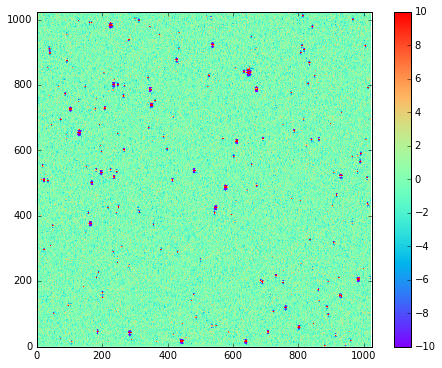

In [324]:
look(im[0]-im[1],range=[-10,10])

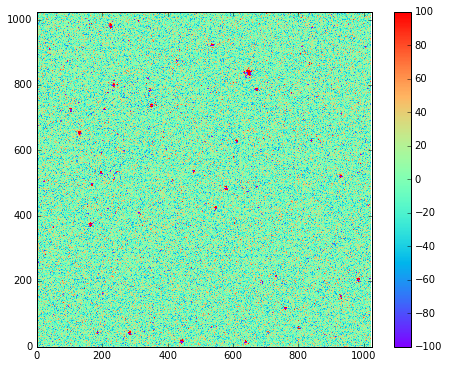

In [232]:
look(self.exposures[3].getMaskedImage().getImage().getArray()-self.exposures[4].getMaskedImage().getImage().getArray(),range=[-100,100])

In [227]:
calexp_208 = self.butler.get("calexp", dataId={'visit': 208, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_212 = self.butler.get("calexp", dataId={'visit': 212, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_216 = self.butler.get("calexp", dataId={'visit': 216, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})
calexp_220 = self.butler.get("calexp", dataId={'visit': 220, 'raft': '2,2', 'sensor': '1,1', 'filter': 'g'})

In [348]:
mask=calexp.getMaskedImage().getMask().getArray()

In [52]:
mask2 = calexp.getMaskedImage().getMask()

In [349]:
psf=calexp.getPsf()

In [356]:
psf_kimg=psf.computeKernelImage()

In [354]:
psf_img.getWidth()

29

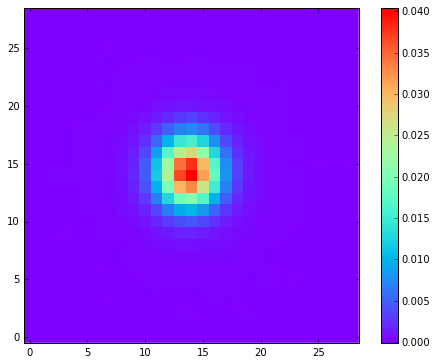

In [353]:
psf_img=psf.computeImage()
look(psf_img.getArray())

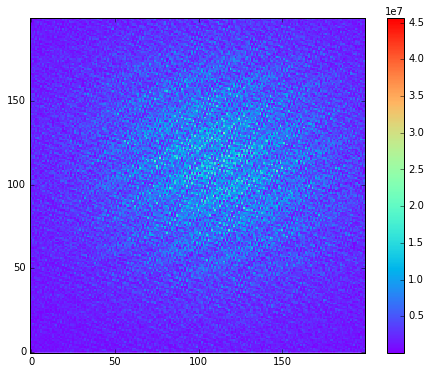

In [70]:
look(np.fft.fftshift(np.abs(np.fft.fft2(calexp.getMaskedImage().getImage().getArray()))),x_range=[400,600],y_range=[400,600])

In [78]:
fimg_208 = np.fft.fftshift(np.fft.fft2(calexp_208.getMaskedImage().getImage().getArray()))
fimg_212 = np.fft.fftshift(np.fft.fft2(calexp_212.getMaskedImage().getImage().getArray()))
fimg_216 = np.fft.fftshift(np.fft.fft2(calexp_216.getMaskedImage().getImage().getArray()))
fimg_220 = np.fft.fftshift(np.fft.fft2(calexp_220.getMaskedImage().getImage().getArray()))

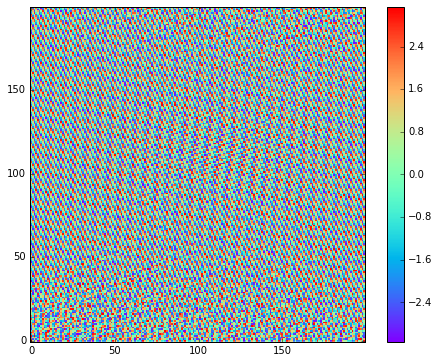

In [176]:
look(np.angle(fimg_208-fimg_220),x_range=[400,600],y_range=[400,600])

In [98]:
import lsst.afw.image as afwImage

In [101]:
afwImage.MaskU_getPlaneBitMask("DETECTED")

32

In [350]:
image = calexp_208.getMaskedImage().getImage().getArray()
mask = np.ones_like(image)
detected_bit = exp.getMaskedImage().getMask().getPlaneBitMask("DETECTED")
mask[np.bitwise_and(exp.getMaskedImage().getMask().getArray(), detected_bit) != detected_bit] = 0.

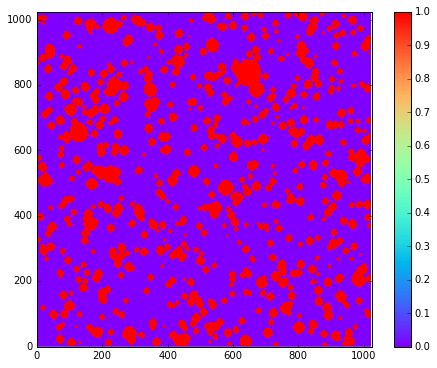

In [363]:
look(mask)

In [381]:
fimage = np.fft.rfft2(image)
fimage2 = np.fft.rfft2(calexp_212.getMaskedImage().getImage().getArray())
fmask = np.fft.rfft2(1 - mask) * np.std(image[mask == 0])

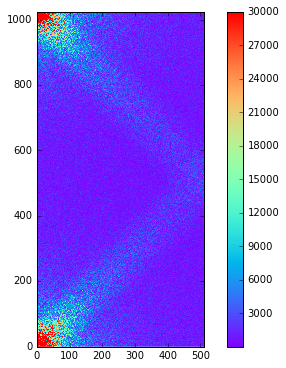

In [384]:
look(np.abs(fmask),range=[-3e4,3e4])

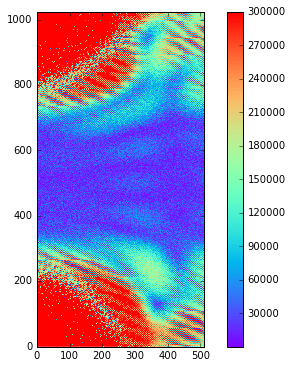

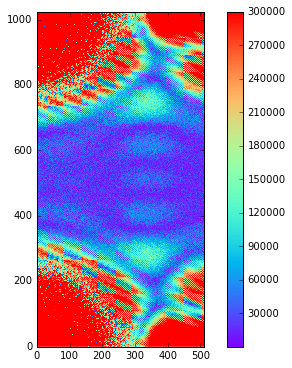

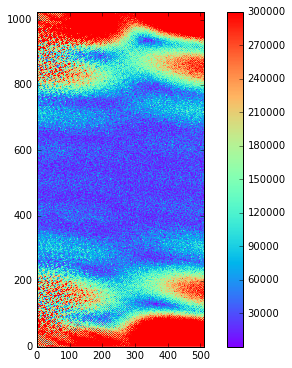

In [390]:
look(np.abs(fimage - fmask),range=[-3e5,3e5])
look(np.abs(fimage2 - fmask),range=[-3e5,3e5])
look(np.abs(fimage - fimage2),range=[-3e5,3e5])